<a href="https://colab.research.google.com/github/MStefanPaulus/Studienarbeit_Image-classification/blob/master/Machine_Learning_Workflow_Studienarbeit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Definition der Aufgabe und Zusammenstellen der Datenmenge**

Die KI soll Probekörper in zwei Kategorien einordnen. Aus den 174 vorliegenden Bildern 17 Bilder als Testbilder zufällig gewählt. Außerdem werden 30 Bilder als Validierungsset zufällig gewählt. Für spätere neuronale Netze werden Möglichkeiten der Data Augmentation genutzt, um die Anzahl der Trainingsbilder zu erhöhen.

### **2. Aufstellen eines Erfolgskriteriums**

Eine möglichst hohe Genauigkeit bei den Validierungs- und insbesondere bei den Testdaten wird angestrebt.

### **3. Auswahl der Bewertungsmethode**

Da es sich erstmal um einen ersten Versuch handelt, wird die Genauigkeit auf dem Validierungsset überwacht. Overfitting wird erwartet, da es ein sehr kleines Datenset ist.

### **4. Vorbereitung der Daten**

In [1]:
!pip install -q -U keras-tuner #Der Keras-Tuner muss erst installiert werden.

     |████████████████████████████████| 61kB 1.9MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import kerastuner as kt
import IPython
from google.colab import files
from keras.preprocessing import image
#Alle benötigten Bibliotheken werden geladen

In [ ]:
train_data = ImageDataGenerator (
    rescale=1. /1024)

train_generator = train_data.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/Bilddaten/Training",
    target_size=(500, 500),
    class_mode="binary",
    batch_size = 25,)

validation_data = ImageDataGenerator (
    rescale=1. /1024)

validation_generator = validation_data.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/Bilddaten/Validation",
    target_size=(500, 500),
    class_mode="binary",
    batch_size = 10)
# Die Daten werden über einen Generator geladen. Dies erlaubt später große Datenmengen schneller zu laden und die Bilder künstlich zu verändern.

Found 128 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


Zuerst werden die benötigten Bibliotheken wie Tensorflow und Keras geladen. Anschließend werden die Bilder aus dem Dateiverzeichnis geladen. Dabei werden sie bereits verändert. Zum einen werden sie normalisiert, d.h. die Pixelwerte werden auf Werte zwischen 0 und 1 gebracht (rescale). Anschließend werden die Bilder auf 500x500 Pixel verkleinert, um den Rechenaufwand zu verringern. 
Die DataGenerator erlauben es Bilder künstlich zu verändern und schnell ins System zu laden. Dies wird später bei großen Datenmengen hilfreich sein.

### **5. Aufstellen eines Modells das besser als zufälliges Raten funktioniert**

In [ ]:
first_model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(12, (3,3),activation="relu",
                                                                     input_shape=(500,500,3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(24, (3,3), activation="relu"),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(36, (3,3), activation="relu"),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(512, activation="relu"),
                                       tf.keras.layers.Dense(1, activation="sigmoid")
                                       ])
first_model.summary()
first_model.compile(loss="binary_crossentropy",
                  optimizer= Adam(lr=0.001),
                  metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 498, 498, 12)      336       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 249, 249, 12)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 247, 247, 24)      2616      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 24)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 121, 121, 36)      7812      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 60, 60, 36)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 129600)           

Ein erstes Modell wird aufgestellt. In der Summary-Funktion wird das Modell näher erläutert. Insgesamt werden 92 Mio Parameter berechnet. Dabei werden zuerst in zwei Schichtabfolgen Merkmale der Bilder erlernt. Anschließend werden alle Daten zu einem großen Tensor, der in den beiden Dense-Schichten (stark vernetzte Schichten) die richtige Zuordnung der Merkmale zu den Klassen vornimmt. Die letzte Schicht mit nur einem künstlichen Neuron wird über die Sigmoid-Funktion aktiviert und teilt damit die Klassen zu (0 oder 1 mit Schwellwert 0,5). Das Modell nutzt binäre Kreuzentropie und den Adam Optimierer mit einer Lernrate von vorerst 0,001.


In [ ]:
training = first_model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 140,
    steps_per_epoch = 5,
    validation_steps = 3,
    verbose = 1)
#Das Modell wird in 140 Durchläufen trainiert. Die Generator stellen die Daten zur Verfügung.

Epoch 1/140
5/5 [==============================] - 23s 5s/step - loss: 2.5120 - accuracy: 0.5049 - val_loss: 1.2625 - val_accuracy: 0.3000
Epoch 2/140
5/5 [==============================] - 19s 4s/step - loss: 0.8268 - accuracy: 0.4660 - val_loss: 0.6007 - val_accuracy: 0.7000
Epoch 3/140
5/5 [==============================] - 19s 4s/step - loss: 0.6510 - accuracy: 0.5728 - val_loss: 0.7344 - val_accuracy: 0.3000
Epoch 4/140
5/5 [==============================] - 22s 4s/step - loss: 0.6698 - accuracy: 0.5840 - val_loss: 0.5872 - val_accuracy: 0.7000
Epoch 5/140
5/5 [==============================] - 19s 4s/step - loss: 0.6851 - accuracy: 0.5728 - val_loss: 0.6090 - val_accuracy: 0.7000
Epoch 6/140
5/5 [==============================] - 22s 4s/step - loss: 0.6315 - accuracy: 0.6720 - val_loss: 0.6065 - val_accuracy: 0.7000
Epoch 7/140
5/5 [==============================] - 20s 4s/step - loss: 0.5853 - accuracy: 0.6602 - val_loss: 0.5351 - val_accuracy: 0.7000
Epoch 8/140
5/5 [==========

In [ ]:
first_model.save("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_70epochs_system_1.h5")
print("hat geklappt!")

hat geklappt!


Das Modell wird abgespeichert, um es später wieder aufrufen zu können, ohne Trainieren zu müssen.

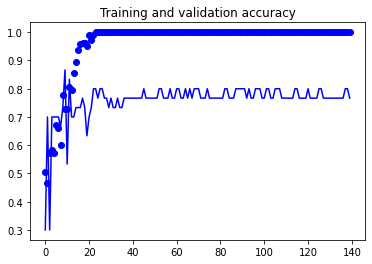

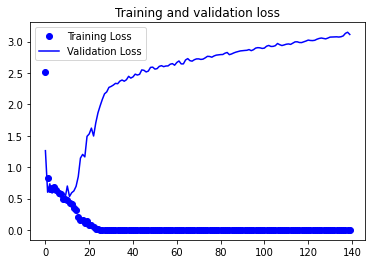

In [ ]:
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
loss = training.history['loss']
val_loss = training.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Diese Diagramme zeigen das Verhalten des Systems. Es zeigt sich, dass es zu einer Überanpassung an die Trainingsdaten gekommen ist. Der Validation-Loss ist sehr hoch, während der Training-Loss sehr gering ist. Die Genauigkeit auf den Validationsdaten ist ebenfalls nicht sehr hoch. Das Modell funktioniert auf den Trainingsdaten und den Validierungsdaten besser als zufälliges Raten.

### **4. Hochskalieren des Modells**

Im Folgenden wird der Datensatz auf 1280 Trainingsbilder vergrößert. Die Bilder werden zehnmal kopiert. Um die Bilder zu verändern und nicht mehrmals die Gleichen zu nutzen, werden die Bilder um bis zu 30° gedreht und zufällig horizontal oder vertikal gespiegelt. So entstehen immer wieder einzigartige neue Bilder, aber mit den gleichen wichtigen (zu erlernenden) Merkmalen. Außerdem werden die Conv2D-Schichten vergrößert. Das Modell passt jetzt bis zu 117 Mio Parameter an.

In [ ]:
train_data = ImageDataGenerator (
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. /1024)

train_generator2 = train_data.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/Bilddaten/Training",
    target_size=(500, 500),
    class_mode="binary",
    batch_size = 32,)


validation_data = ImageDataGenerator (
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. /1024)

validation_generator2 = validation_data.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/Bilddaten/Validation",
    target_size=(500, 500),
    class_mode="binary",
    batch_size = 30)

Found 1280 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
second_model2 = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_140Epochs_System_2.h5")
print("geladen")
second_model2.compile(loss="binary_crossentropy",
                  optimizer= Adam(lr=0.001),
                  metrics=["accuracy"])
training3 = second_model2.fit(
    train_generator2,
    validation_data = validation_generator2,
    epochs = 40,
    steps_per_epoch = 40,
    validation_steps = 10,
    verbose = 1)

geladen
Epoch 1/40
40/40 [==============================] - 834s 21s/step - loss: 0.6810 - accuracy: 0.6406 - val_loss: 0.6302 - val_accuracy: 0.6433
Epoch 2/40
40/40 [==============================] - 414s 10s/step - loss: 0.5297 - accuracy: 0.7406 - val_loss: 0.6030 - val_accuracy: 0.6267
Epoch 3/40
40/40 [==============================] - 417s 10s/step - loss: 0.4985 - accuracy: 0.7688 - val_loss: 0.6888 - val_accuracy: 0.6467
Epoch 4/40
40/40 [==============================] - 418s 10s/step - loss: 0.4280 - accuracy: 0.8070 - val_loss: 0.7586 - val_accuracy: 0.7600
Epoch 5/40
40/40 [==============================] - 417s 10s/step - loss: 0.3998 - accuracy: 0.8352 - val_loss: 0.6893 - val_accuracy: 0.6633
Epoch 6/40
40/40 [==============================] - 412s 10s/step - loss: 0.3382 - accuracy: 0.8555 - val_loss: 0.6733 - val_accuracy: 0.7367
Epoch 7/40
40/40 [==============================] - 415s 10s/step - loss: 0.2674 - accuracy: 0.8945 - val_loss: 0.7529 - val_accuracy: 0.780

In [ ]:
second_model2.save("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_40Epochs_System_2_1.h5")
print("Hat geklappt!")

Hat geklappt!


In [ ]:
second_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0

In [ ]:
acc = training3.history['accuracy']
val_acc = training3.history['val_accuracy']
loss = training3.history['loss']
val_loss = training3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: ignored

Es zeigt sich, dass das Modell nach ungefähr 15 Epochen überangepasst ist. Eine Überanpassung ist aber auch erwartet worden. Nun folgt das Anpassen der Hyperparameter.

### **5. Regularisierung des Modells und Abstimmung der Hyperparameter**

Um die Hyperparameter anzupassen stellt die Keras-Bibliothek einen hilfreichen Tuner bereit. Dieser soll hier genutzt werden. Die Hyperparameter betrifft in diesem Fall die Größe der Schichten, also die Anzahl der Neuronen. Außerdem soll die Lernrate verbessert werden.

In [ ]:
train_data = ImageDataGenerator (
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. /1024)

train_generator3 = train_data.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/Bilddaten/Training",
    target_size=(500, 500),
    class_mode="binary",
    batch_size = 32,)


validation_data = ImageDataGenerator (
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. /1024)

validation_generator3 = validation_data.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/Bilddaten/Validation",
    target_size=(500, 500),
    class_mode="binary",
    batch_size = 30)

Found 1280 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
def model_builder(hp):
  hp_units = hp.Int("units", min_value = 8, max_value = 512, step = 8)
  hp_units2 = hp.Int("units", min_value = 128, max_value= 2048, step = 128)
  third_model = keras.Sequential([
  keras.layers.Conv2D(hp_units, (3,3), activation="relu", input_shape = (500,500,3)),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(hp_units, (3,3),activation="relu"),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(hp_units, (3,3),activation="relu"),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(hp_units2, activation="relu"),
  keras.layers.Dense(1, activation="sigmoid")
  ])
  hp_learning_rate = hp.Choice("learning_rate", values = [0.01, 0.001, 0.0001, 0.005, 0.0005])
  third_model.compile(optimizer = keras.optimizers.Adam(learning_rate= hp_learning_rate), loss = "binary_crossentropy", metrics = ["accuracy"])
  return third_model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = "val_accuracy",
                     max_epochs = 40,
                     factor = 2,
                     directory = "Hyperband",
                     project_name = "Versuch10")
print("läuft")

läuft


In [ ]:
hps= tuner.search(train_generator3,
                  validation_data = validation_generator3,
                  epochs = 40,
                  callbacks = [tf.keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/2


In [ ]:
tuner.results_summary()

**Der Kerastuner liefert keine eindeutigen Ergebnisse.** Deshalb werden verschiedene Hyperparameter systematisch ausprobiert, um das Modell zu verbessern. Gestartet wird dabei mit dem ersten Ergebnis des Tuners. Dabei wird eine Lernrate von 0,005 eingestellt und mit jeder Schicht sinkt die Anzahl der Neuronen um 8.

In [ ]:
fourth_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(3, (3,3),activation="relu",
                                                                     input_shape=(500,500,3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(6, (3,3), activation="relu"),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(9, (3,3), activation="relu"),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(512, activation="relu"),
                                       tf.keras.layers.Dense(1, activation="sigmoid")
                                       ])
fourth_model.summary()
fourth_model.compile(loss="binary_crossentropy",
                  optimizer= Adam(lr=0.001),
                  metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 3)       84        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 6)       168       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 9)       495       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 9)         0         
_________________________________________________________________
flatten (Flatten)            (None, 32400)             0

In [ ]:
training4 = fourth_model.fit(
    train_generator3,
    validation_data = validation_generator3,
    epochs = 40,
    steps_per_epoch = 40,
    validation_steps = 10,
    verbose = 1)

Epoch 1/40
40/40 [==============================] - 761s 19s/step - loss: 0.6508 - accuracy: 0.6023 - val_loss: 0.5611 - val_accuracy: 0.6733
Epoch 2/40
40/40 [==============================] - 248s 6s/step - loss: 0.5123 - accuracy: 0.7547 - val_loss: 0.6510 - val_accuracy: 0.7933
Epoch 3/40
40/40 [==============================] - 248s 6s/step - loss: 0.4572 - accuracy: 0.8016 - val_loss: 0.6266 - val_accuracy: 0.7367
Epoch 4/40
40/40 [==============================] - 249s 6s/step - loss: 0.4372 - accuracy: 0.8047 - val_loss: 0.6347 - val_accuracy: 0.7333
Epoch 5/40
40/40 [==============================] - 251s 6s/step - loss: 0.4075 - accuracy: 0.8258 - val_loss: 0.5905 - val_accuracy: 0.7467
Epoch 6/40
40/40 [==============================] - 250s 6s/step - loss: 0.4018 - accuracy: 0.8438 - val_loss: 0.6312 - val_accuracy: 0.7867
Epoch 7/40
40/40 [==============================] - 252s 6s/step - loss: 0.3617 - accuracy: 0.8703 - val_loss: 0.7031 - val_accuracy: 0.6833
Epoch 8/40
4

In [ ]:
fourth_model.save("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_40Epochs_System_5.h5")

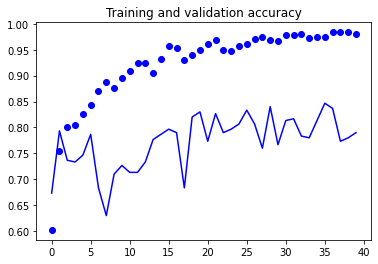

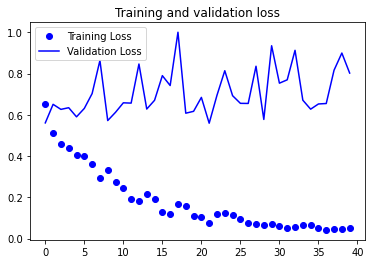

In [ ]:
acc = training4.history['accuracy']
val_acc = training4.history['val_accuracy']
loss = training4.history['loss']
val_loss = training4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Auf Testset 2/17 falsch klassifiziert. siehe unten

In [ ]:
pred_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_40Epochs_System_5.h5")

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(500, 500))
  x = image.img_to_array(img)
  x = x / 1024
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = pred_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " ist herstellbar")
  else:
    print(fn + " ist defekt")

Saving OW_PC_V1_35_io.jpg to OW_PC_V1_35_io (2).jpg
Saving OW_PC_V2_3_io.jpg to OW_PC_V2_3_io (2).jpg
Saving UH_PA3200GF_V1_12_io.jpg to UH_PA3200GF_V1_12_io (2).jpg
Saving UH_PA3200GF_V1_20_io.jpg to UH_PA3200GF_V1_20_io (2).jpg
Saving UH_PA3200GF_V1_50_io.jpg to UH_PA3200GF_V1_50_io (2).jpg
Saving UH_PA3200GF_V3_14_io.jpg to UH_PA3200GF_V3_14_io (2).jpg
Saving UH_PA3200GF_V3_100_io.jpg to UH_PA3200GF_V3_100_io (2).jpg
[0.8756677]
OW_PC_V1_35_io.jpg ist herstellbar
[0.8879612]
OW_PC_V2_3_io.jpg ist herstellbar
[0.99660957]
UH_PA3200GF_V1_12_io.jpg ist herstellbar
[0.99991477]
UH_PA3200GF_V1_20_io.jpg ist herstellbar
[0.9999399]
UH_PA3200GF_V1_50_io.jpg ist herstellbar
[0.9959326]
UH_PA3200GF_V3_14_io.jpg ist herstellbar
[0.99991333]
UH_PA3200GF_V3_100_io.jpg ist herstellbar


**Funktioniert auch mit kleinerer Auflösung?!**


Found 1280 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 3)       84        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 6)         168       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 9)         495       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 9)         0         
_____________________________________

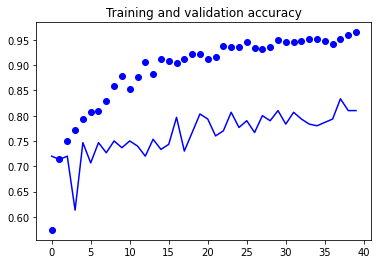

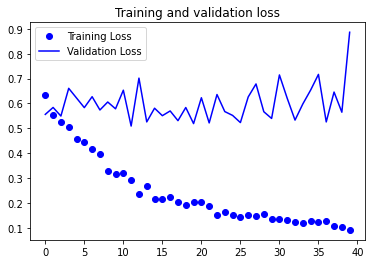

In [ ]:
train_data = ImageDataGenerator (
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. /1024)

train_generator6 = train_data.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/Bilddaten/Training",
    target_size=(150, 150),
    class_mode="binary",
    batch_size = 32,)


validation_data = ImageDataGenerator (
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. /1024)

validation_generator6 = validation_data.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/Bilddaten/Validation",
    target_size=(150, 150),
    class_mode="binary",
    batch_size = 30)

sixth_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(3, (3,3),activation="relu",
                                                                     input_shape=(150,150,3)),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(6, (3,3), activation="relu"),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(9, (3,3), activation="relu"),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(512, activation="relu"),
                                       tf.keras.layers.Dense(1, activation="sigmoid")
                                       ])
sixth_model.summary()
sixth_model.compile(loss="binary_crossentropy",
                  optimizer= Adam(lr=0.001),
                  metrics=["accuracy"])

training6 = sixth_model.fit(
    train_generator6,
    validation_data = validation_generator6,
    epochs = 40,
    steps_per_epoch = 40,
    validation_steps = 10,
    verbose = 1)

sixth_model.save("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_22Epochs_System_6.h5")

acc = training6.history['accuracy']
val_acc = training6.history['val_accuracy']
loss = training6.history['loss']
val_loss = training6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### **6. Testen des Modells**


kleines Modell mit 150x150 Pixeln schneidet auf dem Testset gleich zum 500x500 Pixel Modell ab. Deshalb kleineres Modell bevorzugt. Genaue Auswertung siehe Excel

In [4]:
pred_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_22Epochs_System_6.h5")

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 1024
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = pred_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.75:
    print(fn + " ist herstellbar")
  elif classes[0]<0.25:
      print(fn + " ist defekt")
  else:
    print(fn + " ist unzureichend sicher")

Saving OW_Inc718_V2_30_io.jpg to OW_Inc718_V2_30_io.jpg
Saving UH_PA3200GF_V1_12_io.jpg to UH_PA3200GF_V1_12_io.jpg
Saving UH_PA3200GF_V1_20_io.jpg to UH_PA3200GF_V1_20_io.jpg
Saving UH_PA3200GF_V1_50_io.jpg to UH_PA3200GF_V1_50_io.jpg
Saving UH_PA3200GF_V3_14_io.jpg to UH_PA3200GF_V3_14_io.jpg
Saving UH_PA3200GF_V3_100_io.jpg to UH_PA3200GF_V3_100_io.jpg
[0.8873888]
OW_Inc718_V2_30_io.jpg ist herstellbar
[0.9976275]
UH_PA3200GF_V1_12_io.jpg ist herstellbar
[0.99994195]
UH_PA3200GF_V1_20_io.jpg ist herstellbar
[0.9869273]
UH_PA3200GF_V1_50_io.jpg ist herstellbar
[0.78048027]
UH_PA3200GF_V3_14_io.jpg ist herstellbar
[0.979117]
UH_PA3200GF_V3_100_io.jpg ist herstellbar


2 von 10 falsch klassifiziert. -->hier nur defekte Probekörper Probleme bei PC (insbesondere Oberflächenwinkel?!)

In [ ]:
pred_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_22Epochs_System_6.h5")

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 1024
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = pred_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " ist herstellbar")
  else:
    print(fn + " ist defekt")

Saving OW_PC_V1_35_io.jpg to OW_PC_V1_35_io.jpg
Saving OW_PC_V2_3_io.jpg to OW_PC_V2_3_io.jpg
Saving UH_PA3200GF_V1_12_io.jpg to UH_PA3200GF_V1_12_io.jpg
Saving UH_PA3200GF_V1_20_io.jpg to UH_PA3200GF_V1_20_io.jpg
Saving UH_PA3200GF_V1_50_io.jpg to UH_PA3200GF_V1_50_io.jpg
Saving UH_PA3200GF_V3_14_io.jpg to UH_PA3200GF_V3_14_io.jpg
Saving UH_PA3200GF_V3_100_io.jpg to UH_PA3200GF_V3_100_io.jpg
[0.5115189]
OW_PC_V1_35_io.jpg ist herstellbar
[0.8997581]
OW_PC_V2_3_io.jpg ist herstellbar
[0.9976275]
UH_PA3200GF_V1_12_io.jpg ist herstellbar
[0.99994195]
UH_PA3200GF_V1_20_io.jpg ist herstellbar
[0.9869273]
UH_PA3200GF_V1_50_io.jpg ist herstellbar
[0.78048027]
UH_PA3200GF_V3_14_io.jpg ist herstellbar
[0.979117]
UH_PA3200GF_V3_100_io.jpg ist herstellbar


7 von 7 richtig klassifiziert. --> hier nur herstellbare Probekörper.
**Insgesamt ergibt sich eine Korrektklassifizierungsrate von 1-(2/17) = 88,24 % auf dem Testset**





**Test mit allen Bildern der Oberflächenwinkel**

In [ ]:
pred_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_22Epochs_System_6.h5")

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 1024
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = pred_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " ist herstellbar")
  else:
    print(fn + " ist defekt")

Saving OW_Inc718_V1_20_nio.jpg to OW_Inc718_V1_20_nio.jpg
Saving OW_Inc718_V1_25_nio.jpg to OW_Inc718_V1_25_nio.jpg
Saving OW_Inc718_V1_30_nio.jpg to OW_Inc718_V1_30_nio.jpg
Saving OW_Inc718_V1_35_nio.jpg to OW_Inc718_V1_35_nio (1).jpg
Saving OW_Inc718_V1_40_nio.jpg to OW_Inc718_V1_40_nio.jpg
Saving OW_Inc718_V1_45_nio.jpg to OW_Inc718_V1_45_nio.jpg
Saving OW_Inc718_V2_20_nio.jpg to OW_Inc718_V2_20_nio.jpg
Saving OW_Inc718_V2_25_io.jpg to OW_Inc718_V2_25_io.jpg
Saving OW_Inc718_V2_30_io.jpg to OW_Inc718_V2_30_io.jpg
Saving OW_Inc718_V2_35_io.jpg to OW_Inc718_V2_35_io.jpg
Saving OW_Inc718_V2_40_io.jpg to OW_Inc718_V2_40_io.jpg
Saving OW_Inc718_V2_45_io.jpg to OW_Inc718_V2_45_io.jpg
Saving OW_Inc718_V3_20_nio.jpg to OW_Inc718_V3_20_nio.jpg
Saving OW_Inc718_V3_25_nio.jpg to OW_Inc718_V3_25_nio.jpg
Saving OW_Inc718_V3_30_nio.jpg to OW_Inc718_V3_30_nio.jpg
Saving OW_Inc718_V3_35_nio.jpg to OW_Inc718_V3_35_nio.jpg
Saving OW_Inc718_V3_40_nio.jpg to OW_Inc718_V3_40_nio.jpg
Saving OW_Inc718_V3_

**Test mit allen Bildern der Überhänge**

In [ ]:
pred_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/saved Nets/Alle Bilder_22Epochs_System_6.h5")

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 1024
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = pred_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " ist herstellbar")
  else:
    print(fn + " ist defekt")

Saving ubekannt_12_nio.jpg to ubekannt_12_nio (2).jpg
Saving UH_Inc718_V1_02_io.jpg to UH_Inc718_V1_02_io.jpg
Saving UH_Inc718_V1_04_nio.jpg to UH_Inc718_V1_04_nio.jpg
Saving UH_Inc718_V1_06_nio.jpg to UH_Inc718_V1_06_nio.jpg
Saving UH_Inc718_V1_08_nio.jpg to UH_Inc718_V1_08_nio.jpg
Saving UH_Inc718_V1_10_nio.jpg to UH_Inc718_V1_10_nio.jpg
Saving UH_Inc718_V1_12_nio.jpg to UH_Inc718_V1_12_nio.jpg
Saving UH_Inc718_V1_14_nio.jpg to UH_Inc718_V1_14_nio.jpg
Saving UH_Inc718_V1_16_nio.jpg to UH_Inc718_V1_16_nio (1).jpg
Saving UH_Inc718_V1_18_nio.jpg to UH_Inc718_V1_18_nio.jpg
Saving UH_Inc718_V1_20_nio.jpg to UH_Inc718_V1_20_nio (1).jpg
Saving UH_Inc718_V1_30_nio.jpg to UH_Inc718_V1_30_nio.jpg
Saving UH_Inc718_V2_02_nio.jpg to UH_Inc718_V2_02_nio.jpg
Saving UH_Inc718_V2_04_nio.jpg to UH_Inc718_V2_04_nio.jpg
Saving UH_Inc718_V2_06_nio.jpg to UH_Inc718_V2_06_nio.jpg
Saving UH_Inc718_V2_08_nio.jpg to UH_Inc718_V2_08_nio.jpg
Saving UH_Inc718_V2_10_nio.jpg to UH_Inc718_V2_10_nio (1).jpg
Saving U